In [50]:
import cv2
import mediapipe as mp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [51]:
# initialize Pose estimator
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

pose = mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

In [18]:
# Display the vidoe with the keypoints and skeleton drawn

cap = cv2.VideoCapture('videos/walking.mp4')

while cap.isOpened():
    _, frame = cap.read()

    try:
        RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        results = pose.process(RGB)

        if results.pose_landmarks is not None:
            # Create a dictionary to map keypoints to labels
            keypoints_labels = {
                mp_pose.PoseLandmark.LEFT_ANKLE: 'LEFT ANKLE',
                mp_pose.PoseLandmark.LEFT_KNEE: 'LEFT KNEE',
                mp_pose.PoseLandmark.LEFT_HEEL: 'LEFT HEEL',
                mp_pose.PoseLandmark.LEFT_FOOT_INDEX: 'LEFT FOOT INDEX',
                mp_pose.PoseLandmark.LEFT_HIP: 'LEFT HIP',
                
                mp_pose.PoseLandmark.RIGHT_ANKLE: 'RIGHT ANKLE',
                mp_pose.PoseLandmark.RIGHT_KNEE: 'RIGHT KNEE',
                mp_pose.PoseLandmark.RIGHT_HEEL: 'RIGHT HEEL',
                mp_pose.PoseLandmark.RIGHT_FOOT_INDEX: 'RIGHT FOOT INDEX',
                mp_pose.PoseLandmark.RIGHT_HIP: 'RIGHT HIP',
            }

            time.append(cap.get(cv2.CAP_PROP_POS_MSEC))
            
            # Iterate over the pose landmarks and label them
            for landmark in mp_pose.PoseLandmark:
                if landmark in keypoints_labels.keys():
                    landmark_index = landmark.value
                    landmark_name = keypoints_labels[landmark]
                    data_point = results.pose_landmarks.landmark[landmark_index]
                    x = data_point.x * frame.shape[1]  # Multiply by width to get x-coordinate in pixels
                    y = data_point.y * frame.shape[0]  # Multiply by height to get y-coordinate in pixels

#                     # Draw a label near the keypoint
#                     cv2.putText(frame, f"{landmark_name}", (int(x), int(y) - 10),
#                                 cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
                    
        # draw detected skeleton on the frame
        mp_drawing.draw_landmarks(
            frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # show the final output
        cv2.imshow('Output', frame)

    except:
        break

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



In [52]:
# Create the dataframe with coordinates for important keypoints

cap = cv2.VideoCapture('videos/walking.mp4')

time = []

right_ankle_x = []
right_ankle_y = []

left_ankle_x = []
left_ankle_y = []

right_heel_x = []
right_heel_y = []

left_heel_x = []
left_heel_y = []

right_knee_x = []
right_knee_y = []

left_knee_x = []
left_knee_y = []

right_foot_index_x = []
right_foot_index_y = []

left_foot_index_x = []
left_foot_index_y = []

right_hip_x = []
left_hip_x = []

while cap.isOpened():
    # read frame from capture object
    _, frame = cap.read()

    try:
        # convert the frame to RGB format
        RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # process the RGB frame to get the result
        results = pose.process(RGB)

        if results.pose_landmarks is not None:
            # Create a dictionary to map keypoints to labels
            keypoints_labels = {
                mp_pose.PoseLandmark.LEFT_ANKLE: 'LEFT ANKLE',
                mp_pose.PoseLandmark.LEFT_KNEE: 'LEFT KNEE',
                mp_pose.PoseLandmark.LEFT_HEEL: 'LEFT HEEL',
                mp_pose.PoseLandmark.LEFT_FOOT_INDEX: 'LEFT FOOT INDEX',
                mp_pose.PoseLandmark.LEFT_HIP: 'LEFT HIP',
                
                mp_pose.PoseLandmark.RIGHT_ANKLE: 'RIGHT ANKLE',
                mp_pose.PoseLandmark.RIGHT_KNEE: 'RIGHT KNEE',
                mp_pose.PoseLandmark.RIGHT_HEEL: 'RIGHT HEEL',
                mp_pose.PoseLandmark.RIGHT_FOOT_INDEX: 'RIGHT FOOT INDEX',
                mp_pose.PoseLandmark.RIGHT_HIP: 'RIGHT HIP',
            }


            time.append(cap.get(cv2.CAP_PROP_POS_MSEC))
            
            # Iterate over the pose landmarks and label them
            for landmark in mp_pose.PoseLandmark:
                if landmark in keypoints_labels.keys():
                    landmark_index = landmark.value
                    landmark_name = keypoints_labels[landmark]
                    data_point = results.pose_landmarks.landmark[landmark_index]
                    x = data_point.x * frame.shape[1]  # Multiply by width to get x-coordinate in pixels
                    y = data_point.y * frame.shape[0]  # Multiply by height to get y-coordinate in pixels
                    
                    if landmark == mp_pose.PoseLandmark.RIGHT_ANKLE:
                        right_ankle_x.append(int(x))
                        right_ankle_y.append(int(y))
                    
                    if landmark == mp_pose.PoseLandmark.LEFT_ANKLE:
                        left_ankle_x.append(int(x))
                        left_ankle_y.append(int(y))
                        
                    if landmark == mp_pose.PoseLandmark.RIGHT_HEEL:
                        right_heel_x.append(int(x))
                        right_heel_y.append(int(y))
                    
                    if landmark == mp_pose.PoseLandmark.LEFT_HEEL:
                        left_heel_x.append(int(x))
                        left_heel_y.append(int(y))
                        
                    if landmark == mp_pose.PoseLandmark.RIGHT_FOOT_INDEX:
                        right_foot_index_x.append(int(x))
                        right_foot_index_y.append(int(y))
                    
                    if landmark == mp_pose.PoseLandmark.LEFT_FOOT_INDEX:
                        left_foot_index_x.append(int(x))
                        left_foot_index_y.append(int(y))


    except:
        break

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

data = {
    'time': time,
    'right_ankle_x': right_ankle_x,
    'right_ankle_y': right_ankle_y,
    'left_ankle_x': left_ankle_x,
    'left_ankle_y': left_ankle_y,
    'right_heel_x': right_heel_x,
    'right_heel_y': right_heel_y,
    'left_heel_x': left_heel_x,
    'left_heel_y': left_heel_y,
    'right_foot_index_x': right_foot_index_x,
    'right_foot_index_y': right_foot_index_y,
    'left_foot_index_x': left_foot_index_x,
    'left_foot_index_y': left_foot_index_y
}

df = pd.DataFrame(data)

print(df)


       time  right_ankle_x  right_ankle_y  left_ankle_x  left_ankle_y  \
0       0.0             91            337            95           332   
1      40.0             89            337            98           332   
2      80.0             88            337            98           332   
3     120.0             88            337            99           331   
4     160.0             87            337            99           331   
..      ...            ...            ...           ...           ...   
130  5200.0            857            338           839           335   
131  5240.0            857            338           839           335   
132  5280.0            857            338           839           335   
133  5320.0            857            337           840           335   
134  5360.0            858            337           840           335   

     right_heel_x  right_heel_y  left_heel_x  left_heel_y  right_foot_index_x  \
0              86           349           

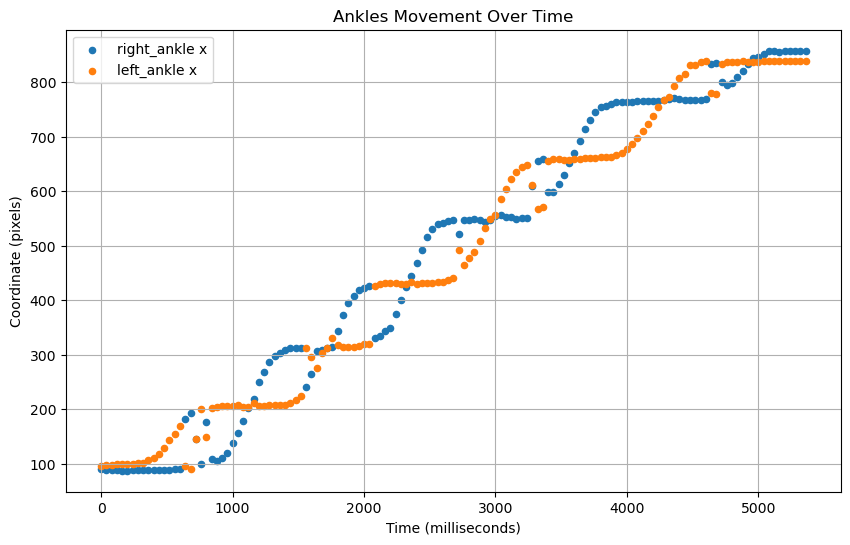

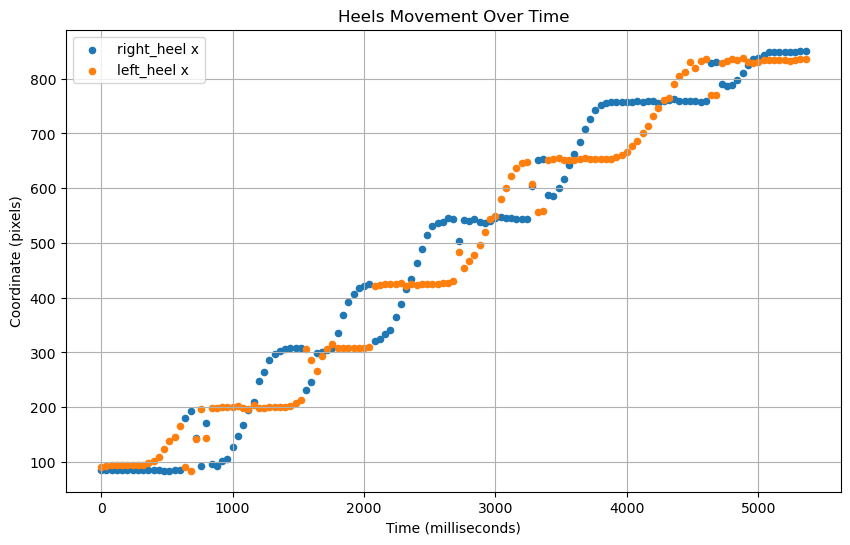

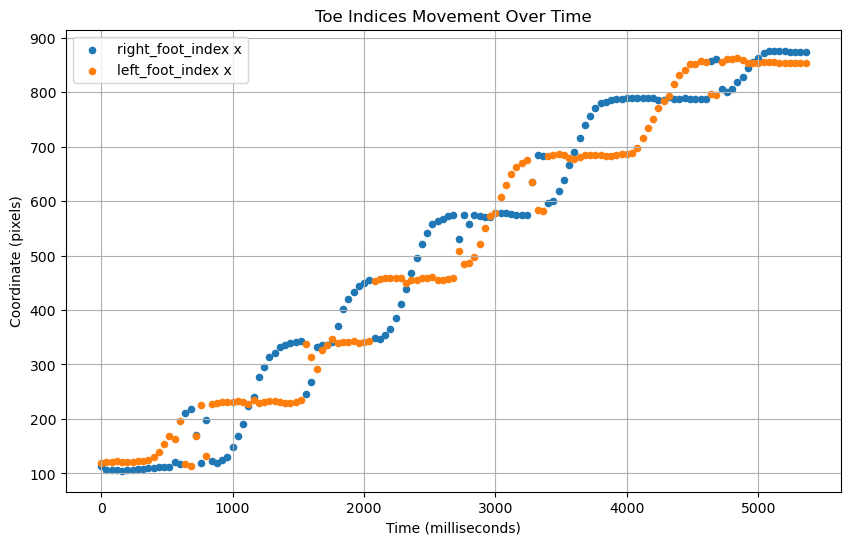

In [53]:
def plot_keypoints_scatter(dataframe, keypoints_names, title):
    plt.figure(figsize=(10, 6))
    for i in range(len(keypoints_names)):
        x_col = f'{keypoints_names[i]}_x'
        y_col = f'{keypoints_names[i]}_y'
        plt.scatter(dataframe['time'], dataframe[x_col], label=f'{keypoints_names[i]} x', s=20)
        #plt.scatter(dataframe['time'], dataframe[y_col], label=f'{keypoints_names[i]} y', s=20)
    plt.xlabel('Time (milliseconds)')
    plt.ylabel('Coordinate (pixels)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

ankles_keypoints = ['right_ankle', 'left_ankle']
heels_keypoints = ['right_heel', 'left_heel']
toe_indices_keypoints = ['right_foot_index', 'left_foot_index']

plot_keypoints_scatter(df, ankles_keypoints, 'Ankles Movement Over Time')
plot_keypoints_scatter(df, heels_keypoints, 'Heels Movement Over Time')
plot_keypoints_scatter(df, toe_indices_keypoints, 'Toe Indices Movement Over Time')

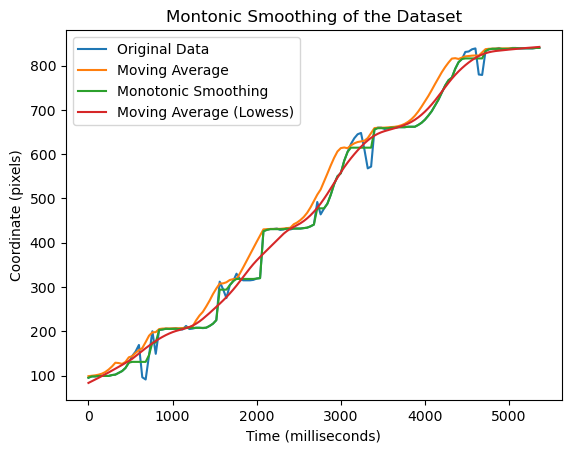

In [56]:
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.isotonic import IsotonicRegression

x_series = df['time'] 
y_series = df['left_ankle_x'] 
x = x_series.values 
y = y_series.values

# Apply Moving Average
window_size = 8 
y_smoothed_ma = np.convolve(y, np.ones(window_size) / window_size, mode='valid')

# Apply Isotonic Regression for Monotonic Smoothing
ir = IsotonicRegression() 
y_smoothed_monotonic = ir.fit_transform(x, y)

# Apply Lowess for Moving Average Smoothing
y_smoothed_lowess = lowess(y, x, frac=0.2)

#Plot the original and smoothed datasets
plt.plot(x, y, label='Original Data') 
plt.plot(x[:len(y_smoothed_ma)], y_smoothed_ma, label='Moving Average') 
plt.plot(x, y_smoothed_monotonic, label='Monotonic Smoothing')
plt.plot(y_smoothed_lowess[:, 0], y_smoothed_lowess[:, 1], label='Moving Average (Lowess)')
plt.legend() 
plt.xlabel('Time (milliseconds)') 
plt.ylabel('Coordinate (pixels)') 
plt.title('Montonic Smoothing of the Dataset') 
plt.show()

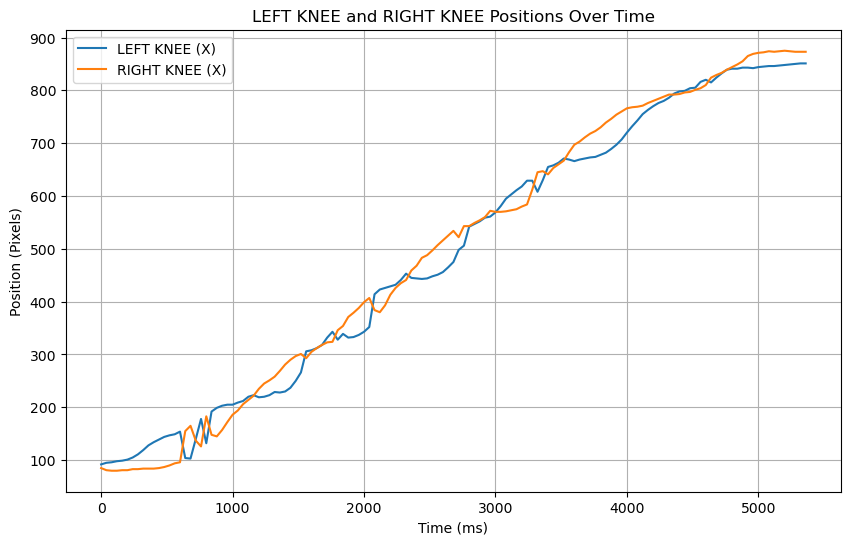

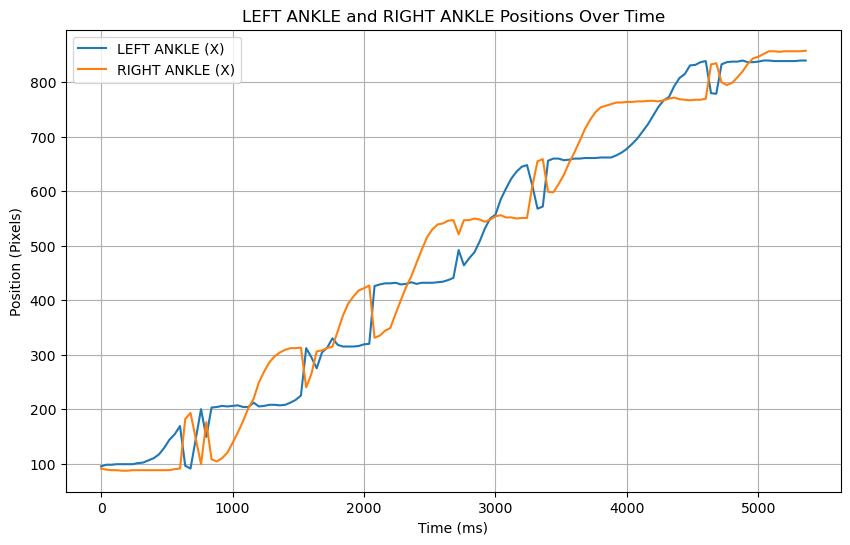

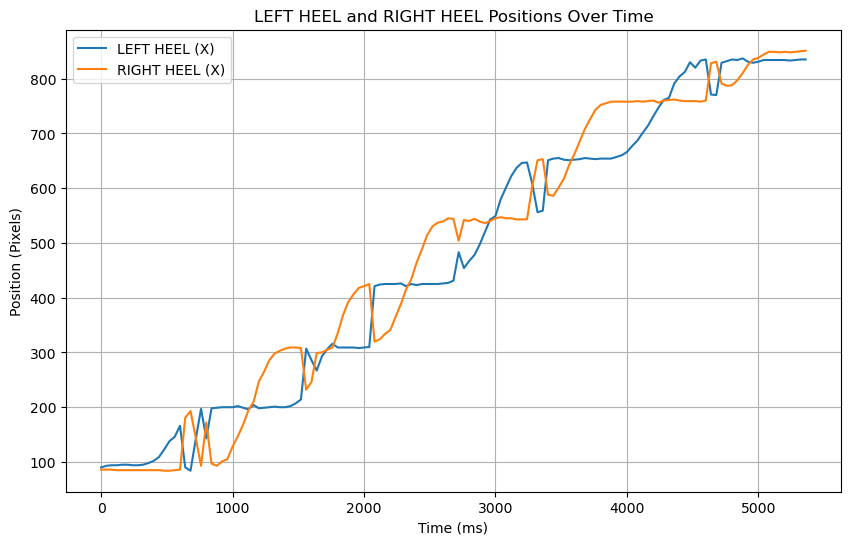

In [20]:
limb_pairs = [('LEFT KNEE', 'RIGHT KNEE'), ('LEFT ANKLE', 'RIGHT ANKLE'), ('LEFT HEEL', 'RIGHT HEEL')]

for left_landmark, right_landmark in limb_pairs:
    left_df = df[df['Landmark'] == left_landmark]
    right_df = df[df['Landmark'] == right_landmark]

    if not left_df.empty and not right_df.empty:
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(left_df['Time (ms)'], left_df['X Coordinate'], label=f'{left_landmark} (X)')
        ax.plot(right_df['Time (ms)'], right_df['X Coordinate'], label=f'{right_landmark} (X)')
        
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Position (Pixels)')
        ax.set_title(f'{left_landmark} and {right_landmark} Positions Over Time')
        ax.legend()
        ax.grid(True)

plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

right_distances = []
left_distances = []

for time in df['Time (ms)'].unique():
    time_df = df[df['Time (ms)'] == time]
    right_hip = time_df[time_df['Landmark'] == 'RIGHT HIP']
    right_ankle = time_df[time_df['Landmark'] == 'RIGHT ANKLE']
    left_hip = time_df[time_df['Landmark'] == 'LEFT HIP']
    left_ankle = time_df[time_df['Landmark'] == 'LEFT ANKLE']

     # Calculate distance between right ankle and right hip
    if not right_hip.empty and not right_ankle.empty:
        distance_right_ankle_to_right_hip = right_ankle['X Coordinate'].values[0] - right_hip['X Coordinate'].values[0]
        right_distances.append(distance_right_ankle_to_right_hip)

    # Calculate distance between left ankle and left hip
    if not left_hip.empty and not left_ankle.empty:
        distance_left_ankle_to_left_hip = left_ankle['X Coordinate'].values[0] - left_hip['X Coordinate'].values[0]
        left_distances.append(distance_left_ankle_to_left_hip)

data_distances = {
    'Time (ms)': df['Time (ms)'].unique(),
    'Right Ankle to Right Hip Distance': right_distances,
    'Left Ankle to Left Hip Distance': left_distances
}

distances_df = pd.DataFrame(data_distances)

print(distances_df)


     Time (ms)  Right Ankle to Right Hip Distance  \
0          0.0                                 13   
1         40.0                                 12   
2         80.0                                 11   
3        120.0                                 11   
4        160.0                                  9   
..         ...                                ...   
130     5200.0                                -17   
131     5240.0                                -18   
132     5280.0                                -19   
133     5320.0                                -21   
134     5360.0                                -21   

     Left Ankle to Left Hip Distance  
0                                 -1  
1                                  1  
2                                  0  
3                                  0  
4                                 -1  
..                               ...  
130                              -13  
131                              -14  
132         

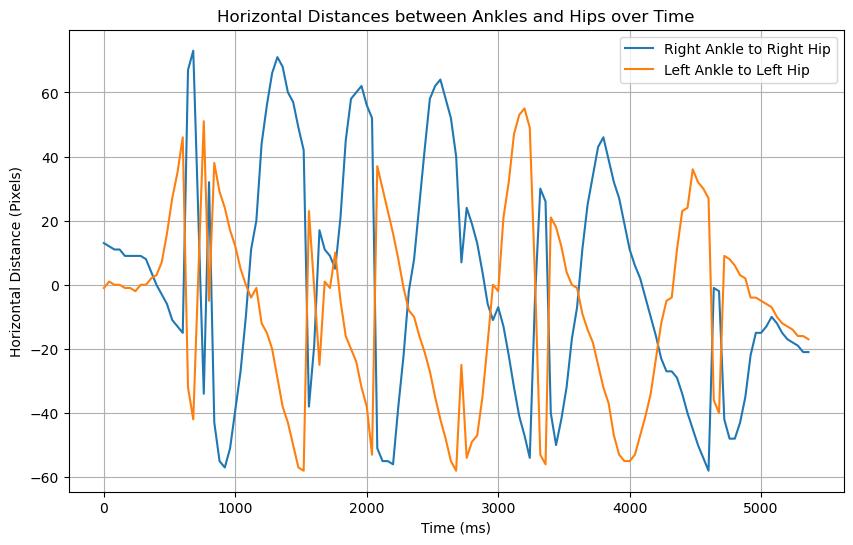

In [14]:
# Horizontal Distnace between ankles and hips over time
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(distances_df['Time (ms)'], distances_df['Right Ankle to Right Hip Distance'], label='Right Ankle to Right Hip')
ax.plot(distances_df['Time (ms)'], distances_df['Left Ankle to Left Hip Distance'], label='Left Ankle to Left Hip')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Horizontal Distance (Pixels)')
ax.set_title('Horizontal Distances between Ankles and Hips over Time')
ax.legend()
ax.grid(True)

plt.show()